# Text Classification: Name Gender

Here is a partition of the name gender data into training, dev-test, and test data as shown in the lectures:

In [1]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\BEYOND\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


In [5]:
len(m)

2943

In [9]:
f[:10]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale']

In [3]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

And here is one of the classifiers given in the lectures.

In [19]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}
#extract the features
train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]

#train the model
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)

#test the model
nltk.classify.accuracy(classifier2, devtest_set2)

0.77

In [17]:
devtest_set2[:10]

[({'suffix1': 'e', 'suffix2': 'ce'}, 'female'),
 ({'suffix1': 'e', 'suffix2': 'ie'}, 'female'),
 ({'suffix1': 'e', 'suffix2': 'ne'}, 'female'),
 ({'suffix1': 's', 'suffix2': 'ts'}, 'male'),
 ({'suffix1': 'y', 'suffix2': 'ry'}, 'male'),
 ({'suffix1': 'y', 'suffix2': 'ny'}, 'male'),
 ({'suffix1': 'n', 'suffix2': 'en'}, 'male'),
 ({'suffix1': 'n', 'suffix2': 'on'}, 'male'),
 ({'suffix1': 't', 'suffix2': 'et'}, 'male'),
 ({'suffix1': 'm', 'suffix2': 'im'}, 'female')]

### Exercise: Using more information
Define a new function `gender_features5` that takes, as features, any suffixes of size 1, 2, 3, 4, and 5. Examine the accuracy results. What can you conclude from this new classifier?

In [53]:
def gender_features5(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'suffix4': word[-4:],
            'suffix5': word[-5:]}
#extract the features
train_set5 = [(gender_features5(n), g) for n, g in train_names]
devtest_set5 = [(gender_features5(n), g) for n, g in devtest_names]

#train the model
classifier5 = nltk.NaiveBayesClassifier.train(train_set5)

#test the model
nltk.classify.accuracy(classifier5, devtest_set5)

0.802

In [61]:
def gender_features3(word):
    return {
            'suffix3': word[-3:],
            'suffix4': word[-4:],
            'suffix5': word[-5:]}
#extract the features
train_set3 = [(gender_features3(n), g) for n, g in train_names]
devtest_set3 = [(gender_features3(n), g) for n, g in devtest_names]

#train the model
classifier3 = nltk.NaiveBayesClassifier.train(train_set3)

#test the model
nltk.classify.accuracy(classifier3, devtest_set3)

0.786

## Adding more features will bring more accuracy, adding more features does not help us increase the accuracy as related with the first two suffix

### Exercise: Plot the impact of the training size on our classifier

The following code plots the classifier accuracy on the training and dev-test set as we increase the training size on the classifier we used in the. Examine the plot and answer the following questions:

1. From what amount of training data you would judge that the system stops over-fitting?
2. From what amount of training data would you say that there is no need to add more training data?

In [46]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 1000, 5)
for n in nsamples:
    classifier2 = nltk.NaiveBayesClassifier.train(train_set2[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2, train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2, devtest_set2))

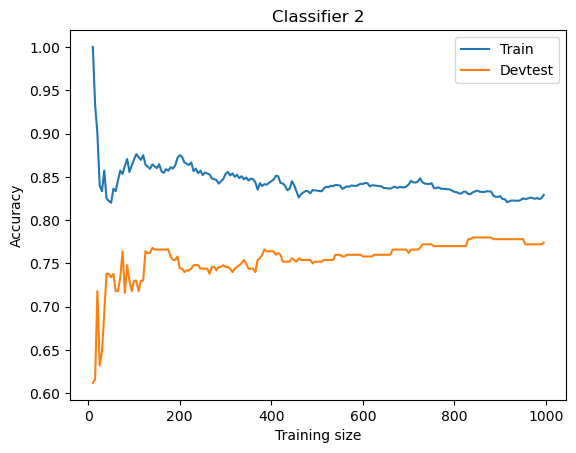

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

# The more the gap between the graph, the more the overfitting, at the 800-850 training size it has more ovrfitting.
# After 1000 dataset there is no more neeed to add more data

### Exercise: Plot the impact of the training size on your classifier

Make the same plot, this time using the classifier that uses the feature extractor that you have designed. Compare your plot against the one in the above exercise.

In [71]:
train_accuracy5 = []
devtest_accuracy5 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier5 = nltk.NaiveBayesClassifier.train(train_set5[:n])
    train_accuracy5.append(nltk.classify.accuracy(classifier5, train_set5[:n]))
    devtest_accuracy5.append(nltk.classify.accuracy(classifier5, devtest_set5))

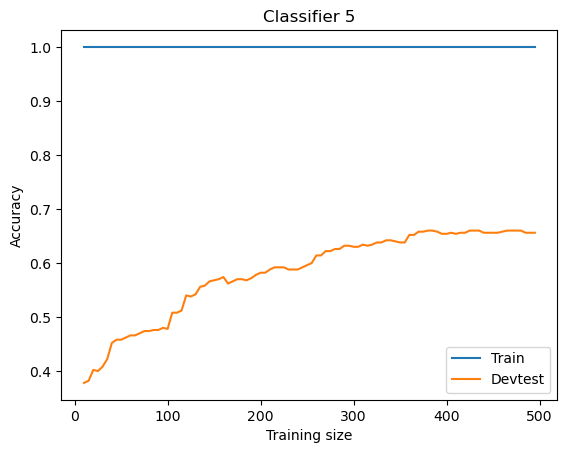

In [72]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy5, label='Train')
plt.plot(nsamples, devtest_accuracy5, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 5')
plt.legend()

In [109]:
train_accuracy3 = []
devtest_accuracy3 = []
nsamples = range(10, 1000, 5)
for n in nsamples:
    classifier3 = nltk.NaiveBayesClassifier.train(train_set3[:n])
    train_accuracy3.append(nltk.classify.accuracy(classifier3, train_set3[:n]))
    devtest_accuracy3.append(nltk.classify.accuracy(classifier3, devtest_set3))

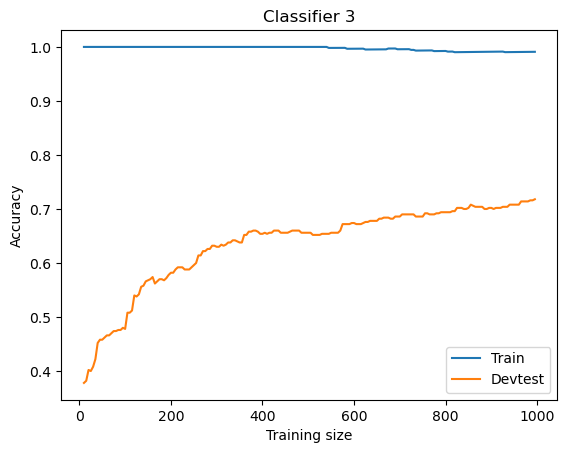

In [67]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy3, label='Train')
plt.plot(nsamples, devtest_accuracy3, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 3')
plt.legend()

### Exercise: Repeat the analysis using sk-learn

The lectures show how to use sklearn to implement the name classifier. Replicate the work in this workshop and try to answer the same questions as above.

1. Is it better to use the last two characters, or the last 5 characters?
2. From what amount of training data you would judge that the system stops overfitting?
3. From what amount of training data would you say that there is no need to add more training data?


In [76]:
def one_hot_char(c):
    alphabet='abcdefghiklmnopqrstuvwxyz'
    result=[0]*(len(alphabet)+1)
    i=alphabet.find(c.lower())
    if i>0:
        result[i]=1
    else:
        result[len(alphabet)]=1
    return result

def sk_gender_feature2(word):
    assert len(word) >=2
    last=one_hot_char(word[-1])
    secondlast=one_hot_char(word[-2])
    return secondlast+last

In [88]:
from sklearn.naive_bayes import MultinomialNB
#extract the features from data
sk_train_set2=[(sk_gender_feature2(n),g) for n,g in train_names]
sk_validation_set2=[(sk_gender_feature2(n),g) for n,g in devtest_names]
#intialize the model
sk_model2=MultinomialNB()
# prepare the model

train_X,train_y=zip(*sk_train_set2)
validation_X,validation_y=zip(*sk_validation_set2)
#train the model
sk_model2.fit(train_X,train_y)


MultinomialNB()

In [90]:
#Get the predictions
from sklearn.metrics import accuracy_score
val_predictions=sk_model2.predict(validation_X)
val_acc=accuracy_score(validation_y,val_predictions)
print(val_acc)

0.752


#  5 Words

In [103]:
def one_hot_char(c):
    alphabet='abcdefghiklmnopqrstuvwxyz'
    result=[0]*(len(alphabet)+1)
    i=alphabet.find(c.lower())
    if i>0:
        result[i]=1
    else:
        result[len(alphabet)]=1
    return result

def sk_gender_feature5(word):
    features=[]
    for i in range(5):
        if i<=len(word):
            features+=one_hot_char(word[-i])
        else:
            features+=one_hot_char(' ')
    return features

In [105]:
from sklearn.naive_bayes import MultinomialNB
#extract the features from data
sk_train_set5=[(sk_gender_feature5(n),g) for n,g in train_names]
sk_validation_set5=[(sk_gender_feature5(n),g) for n,g in devtest_names]
#intialize the model
sk_model5=MultinomialNB()
# prepare the model

train_X,train_y=zip(*sk_train_set5)
validation_X,validation_y=zip(*sk_validation_set5)
#train the model
sk_model5.fit(train_X,train_y)


MultinomialNB()

In [107]:
#Get the predictions
from sklearn.metrics import accuracy_score
val_predictions=sk_model5.predict(validation_X)
val_acc=accuracy_score(validation_y,val_predictions)
print(val_acc)

0.782


In [117]:
train_accuracy5 = []
devtest_accuracy5 = []
nsamples = range(10, 1000, 5)
for n in nsamples:
    #extract the predictions(skip)
    #Intialize the model
    sk_model=MultinomialNB()
    #prepare the model(skipped)
    #train the model
    sk_model.fit(train_X[:n],train_y[:n])

    #get the tarining accuracy
    train_pred= sk_model.predict(train_X[:n])
    train_acc=accuracy_score(train_pred,train_y[:n])
    train_accuracy5.append(train_acc)

#get the validation accuracy
    val_pred=sk_model.predict(validation_X)
    val_acc=accuracy_score(val_pred,validation_y)
    devtest_accuracy5.append(val_acc)

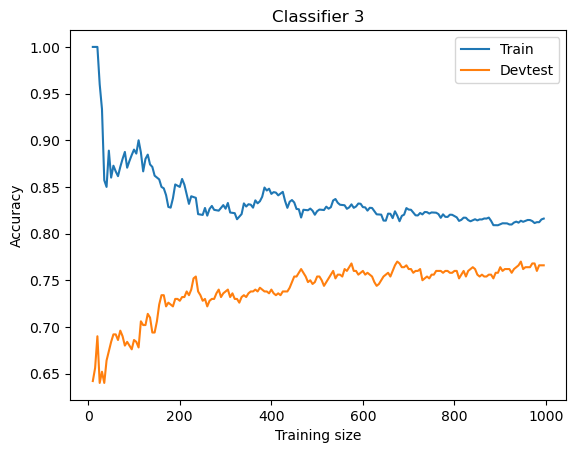

In [119]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy5, label='Train')
plt.plot(nsamples, devtest_accuracy5, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 3')
plt.legend()